### Logistic Regression with sklearn
#### Titanic data

In [ ]:
import numpy as np

In [ ]:
# load the csv file up into the cloud

from google.colab import files
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['titanic3.csv']))
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
y = df.survived
X = df[['pclass']]
X.head()

,pclass
0,1
1,1
2,1
3,1
4,1


In [ ]:
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (1047, 1)
test size: (262, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(logreg.coef_, logreg.intercept_)

[[-0.78602161]] [1.28948924]


In [ ]:
# make predictions

y_pred = logreg.predict(X_test)

In [ ]:
# evaluation
from sklearn.metrics import accuracy_score

print('accuracy = ', accuracy_score(y_test, y_pred))

accuracy =  0.6679389312977099


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76       163
           1       0.59      0.39      0.47        99

    accuracy                           0.67       262
   macro avg       0.64      0.61      0.62       262
weighted avg       0.65      0.67      0.65       262



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[136  27]
 [ 60  39]]


In [ ]:
from sklearn.metrics import matthews_corrcoef

print(matthews_corrcoef(y_test, y_pred))

0.25498123399098876


In [ ]:
s = sum(y_test)
l = len(y_test)
print('percentage died: ', (l-s) / l)

percentage died:  0.6221374045801527


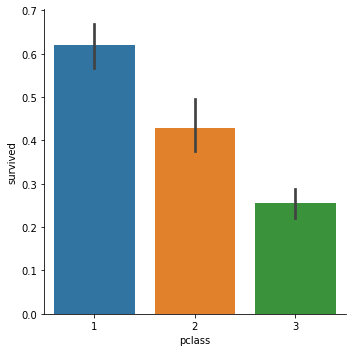

In [ ]:
import seaborn as sb 

sb.catplot(x="pclass", y="survived", kind="bar", data=df)